#                                                             DATA_ENGG_FINAL_PROJECT                                       

                                                                             

###                                                                                                                        Dhruv, Dhara

In [7]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=918483eba8bef5f71d100b3382083551dac55047018565bdb5ab25b8bb49dd64
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for plotting world map
import plotly.express as px

#for getting ISO 3 code from country names
import pycountry



# Load Covid19_data

In [10]:
from google.colab import files
uploaded = files.upload()

Saving covid19_data.csv to covid19_data.csv


In [11]:

data = pd.read_csv("covid19_data.csv")
data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


### •  Create a new columns which is genarate every country ISO code. 

In [12]:

#function that return country_code which take country_name as parameter
def country_code(country):
  try:
    country_iso = pycountry.countries.search_fuzzy(country)[0].alpha_3
  except:
    country_iso = None
  return country_iso

#creating new table with country_name and country_codes
countries = pd.DataFrame(data = data["Country/Region"].unique(),columns=["Country/Region"])
countries["iso"] = countries["Country/Region"].apply(country_code)
countries

,Country/Region,iso
0,USA,USA
1,Brazil,BRA
2,India,IND
3,Russia,RUS
4,South Africa,ZAF
...,...,...
204,Montserrat,MSR
205,Caribbean Netherlands,None
206,Falkland Islands,FLK
207,Vatican City,VAT


### •  Merging ISO table with Covid19 table

In [13]:
#merging
df = pd.merge(data,countries,how='inner',on='Country/Region')
df.style.background_gradient(cmap='Reds')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso
0,USA,North America,331198130.000000,5032179,nan,162804.000000,nan,2576668.000000,nan,2292707.000000,18296.000000,15194.000000,492.000000,63139605.000000,190640.000000,Americas,USA
1,Brazil,South America,212710692.000000,2917562,nan,98644.000000,nan,2047660.000000,nan,771258.000000,8318.000000,13716.000000,464.000000,13206188.000000,62085.000000,Americas,BRA
2,India,Asia,1381344997.000000,2025409,nan,41638.000000,nan,1377384.000000,nan,606387.000000,8944.000000,1466.000000,30.000000,22149351.000000,16035.000000,South-EastAsia,IND
3,Russia,Europe,145940924.000000,871894,nan,14606.000000,nan,676357.000000,nan,180931.000000,2300.000000,5974.000000,100.000000,29716907.000000,203623.000000,Europe,RUS
4,South Africa,Africa,59381566.000000,538184,nan,9604.000000,nan,387316.000000,nan,141264.000000,539.000000,9063.000000,162.000000,3149807.000000,53044.000000,Africa,ZAF
5,Mexico,North America,129066160.000000,462690,6590.000000,50517.000000,819.000000,308848.000000,4140.000000,103325.000000,3987.000000,3585.000000,391.000000,1056915.000000,8189.000000,Americas,MEX
6,Peru,South America,33016319.000000,455409,nan,20424.000000,nan,310337.000000,nan,124648.000000,1426.000000,13793.000000,619.000000,2493429.000000,75521.000000,Americas,PER
7,Chile,South America,19132514.000000,366671,nan,9889.000000,nan,340168.000000,nan,16614.000000,1358.000000,19165.000000,517.000000,1760615.000000,92022.000000,Americas,CHL
8,Colombia,South America,50936262.000000,357710,nan,11939.000000,nan,192355.000000,nan,153416.000000,1493.000000,7023.000000,234.000000,1801835.000000,35374.000000,Americas,COL
9,Spain,Europe,46756648.000000,354530,nan,28500.000000,nan,nan,nan,nan,617.000000,7582.000000,610.000000,7064329.000000,151087.000000,Europe,ESP


### •  Explore the number of rows, columns and ranges of values.

In [14]:
# computing number of rows
count_rows = len(data.axes[0])
 
# computing number of columns
count_cols = len(data.axes[1])
 

print("Number of Rows: ", count_rows)
print("Number of Columns: ", count_cols)

Number of Rows:  209
Number of Columns:  16


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [16]:
#range of values
data['TotalCases'].between(500000, 5000000)

0      False
1       True
2       True
3       True
4       True
       ...  
204    False
205    False
206    False
207    False
208    False
Name: TotalCases, Length: 209, dtype: bool

#  Missing data:

### •  Missing data, also known as missing values, is where some of the observations in a data set are blank.

In [17]:
#Missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

### •  If missing data is present in table, its shows true

In [18]:

data.isnull().style.background_gradient(cmap='Reds')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
7,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
8,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
9,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False


### •  If any columns have null value then its shows 

In [19]:
data.isnull().any()

Country/Region      False
Continent            True
Population           True
TotalCases          False
NewCases             True
TotalDeaths          True
NewDeaths            True
TotalRecovered       True
NewRecovered         True
ActiveCases          True
Serious,Critical     True
Tot Cases/1M pop     True
Deaths/1M pop        True
TotalTests           True
Tests/1M pop         True
WHO Region           True
dtype: bool

In [20]:
missing_data(data)


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
Total,0,1,1,0,205,21,206,4,206,4,87,1,22,18,18,25
Percent,0.0,0.478469,0.478469,0.0,98.086124,10.047847,98.564593,1.913876,98.564593,1.913876,41.626794,0.478469,10.526316,8.61244,8.61244,11.961722
Types,object,object,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object


# clean invalid Data

In [21]:
clean = data.dropna()
clean.head().style.background_gradient(cmap='Reds')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129066160.000000,462690,6590.000000,50517.000000,819.000000,308848.000000,4140.000000,103325.000000,3987.000000,3585.000000,391.000000,1056915.000000,8189.000000,Americas
28,Bolivia,South America,11688459.000000,86423,1282.000000,3465.000000,80.000000,27373.000000,936.000000,55585.000000,71.000000,7394.000000,296.000000,183583.000000,15706.000000,Americas
72,S. Korea,Asia,51273732.000000,14519,20.000000,303.000000,1.000000,13543.000000,42.000000,673.000000,18.000000,283.000000,6.000000,1613652.000000,31471.000000,WesternPacific


### •  Replace NaN values by 0

In [22]:
data.fillna(0, inplace=True)

data.style.background_gradient(cmap='Reds')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.000000,5032179,0.000000,162804.000000,0.000000,2576668.000000,0.000000,2292707.000000,18296.000000,15194.000000,492.000000,63139605.000000,190640.000000,Americas
1,Brazil,South America,212710692.000000,2917562,0.000000,98644.000000,0.000000,2047660.000000,0.000000,771258.000000,8318.000000,13716.000000,464.000000,13206188.000000,62085.000000,Americas
2,India,Asia,1381344997.000000,2025409,0.000000,41638.000000,0.000000,1377384.000000,0.000000,606387.000000,8944.000000,1466.000000,30.000000,22149351.000000,16035.000000,South-EastAsia
3,Russia,Europe,145940924.000000,871894,0.000000,14606.000000,0.000000,676357.000000,0.000000,180931.000000,2300.000000,5974.000000,100.000000,29716907.000000,203623.000000,Europe
4,South Africa,Africa,59381566.000000,538184,0.000000,9604.000000,0.000000,387316.000000,0.000000,141264.000000,539.000000,9063.000000,162.000000,3149807.000000,53044.000000,Africa
5,Mexico,North America,129066160.000000,462690,6590.000000,50517.000000,819.000000,308848.000000,4140.000000,103325.000000,3987.000000,3585.000000,391.000000,1056915.000000,8189.000000,Americas
6,Peru,South America,33016319.000000,455409,0.000000,20424.000000,0.000000,310337.000000,0.000000,124648.000000,1426.000000,13793.000000,619.000000,2493429.000000,75521.000000,Americas
7,Chile,South America,19132514.000000,366671,0.000000,9889.000000,0.000000,340168.000000,0.000000,16614.000000,1358.000000,19165.000000,517.000000,1760615.000000,92022.000000,Americas
8,Colombia,South America,50936262.000000,357710,0.000000,11939.000000,0.000000,192355.000000,0.000000,153416.000000,1493.000000,7023.000000,234.000000,1801835.000000,35374.000000,Americas
9,Spain,Europe,46756648.000000,354530,0.000000,28500.000000,0.000000,0.000000,0.000000,0.000000,617.000000,7582.000000,610.000000,7064329.000000,151087.000000,Europe


# Data Cleaning:

### • Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [23]:
#DATA CLEANING IN PYTHON
#Dropping Duplicates

a=data.tail(10)
a.style.background_gradient(cmap='Reds')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
199,New Caledonia,Australia/Oceania,285769.000000,22,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,77.000000,0.000000,11099.000000,38839.000000,0
200,Laos,Asia,7285750.000000,20,0.000000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,3.000000,0.000000,29374.000000,4032.000000,WesternPacific
201,Dominica,North America,72004.000000,18,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,250.000000,0.000000,1005.000000,13958.000000,Americas
202,Saint Kitts and Nevis,North America,53237.000000,17,0.000000,0.000000,0.000000,16.000000,0.000000,1.000000,0.000000,319.000000,0.000000,1146.000000,21526.000000,Americas
203,Greenland,North America,56780.000000,14,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,247.000000,0.000000,5977.000000,105266.000000,Europe
204,Montserrat,North America,4992.000000,13,0.000000,1.000000,0.000000,10.000000,0.000000,2.000000,0.000000,2604.000000,200.000000,61.000000,12220.000000,0
205,Caribbean Netherlands,North America,26247.000000,13,0.000000,0.000000,0.000000,7.000000,0.000000,6.000000,0.000000,495.000000,0.000000,424.000000,16154.000000,0
206,Falkland Islands,South America,3489.000000,13,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,3726.000000,0.000000,1816.000000,520493.000000,0
207,Vatican City,Europe,801.000000,12,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,14981.000000,0.000000,0.000000,0.000000,Europe
208,Western Sahara,Africa,598682.000000,10,0.000000,1.000000,0.000000,8.000000,0.000000,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,Africa


### • if any rows have duplicate value then its true either its shows true

In [24]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205    False
206    False
207    False
208    False
Length: 209, dtype: bool

In [25]:
covid19_data = data.rename(columns={"Country/Region":"COUNTRY","Continent":"CONTINENT","Population":"POPULATION","TotalCases":"TOTAL_CASES","NewCases":"NEW_CASES","TotalDeaths":"TOTAL_DEATHS","NewDeaths":"NEW_DEATHS","TotalRecovered":"TOTAL_RECOVERED","NewRecovered":"NEW_RECOVERED","ActiveCases":"ACTIVE_CASES","Serious,Critical":"CRITICAL_CASES","Tot Cases/1M pop":"TOTAL_CASES_1M/pop","Deaths/1M pop":"DEATHS_CASES_1M/pop","TotalTests":"TOTAL_TESTS","Tests/1M pop":"TESTS/1M_pop","WHO Region":"WHO_REGION"})
# display the dataframe
covid19_data.style.background_gradient(cmap='Reds')

,COUNTRY,CONTINENT,POPULATION,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_RECOVERED,NEW_RECOVERED,ACTIVE_CASES,CRITICAL_CASES,TOTAL_CASES_1M/pop,DEATHS_CASES_1M/pop,TOTAL_TESTS,TESTS/1M_pop,WHO_REGION
0,USA,North America,331198130.000000,5032179,0.000000,162804.000000,0.000000,2576668.000000,0.000000,2292707.000000,18296.000000,15194.000000,492.000000,63139605.000000,190640.000000,Americas
1,Brazil,South America,212710692.000000,2917562,0.000000,98644.000000,0.000000,2047660.000000,0.000000,771258.000000,8318.000000,13716.000000,464.000000,13206188.000000,62085.000000,Americas
2,India,Asia,1381344997.000000,2025409,0.000000,41638.000000,0.000000,1377384.000000,0.000000,606387.000000,8944.000000,1466.000000,30.000000,22149351.000000,16035.000000,South-EastAsia
3,Russia,Europe,145940924.000000,871894,0.000000,14606.000000,0.000000,676357.000000,0.000000,180931.000000,2300.000000,5974.000000,100.000000,29716907.000000,203623.000000,Europe
4,South Africa,Africa,59381566.000000,538184,0.000000,9604.000000,0.000000,387316.000000,0.000000,141264.000000,539.000000,9063.000000,162.000000,3149807.000000,53044.000000,Africa
5,Mexico,North America,129066160.000000,462690,6590.000000,50517.000000,819.000000,308848.000000,4140.000000,103325.000000,3987.000000,3585.000000,391.000000,1056915.000000,8189.000000,Americas
6,Peru,South America,33016319.000000,455409,0.000000,20424.000000,0.000000,310337.000000,0.000000,124648.000000,1426.000000,13793.000000,619.000000,2493429.000000,75521.000000,Americas
7,Chile,South America,19132514.000000,366671,0.000000,9889.000000,0.000000,340168.000000,0.000000,16614.000000,1358.000000,19165.000000,517.000000,1760615.000000,92022.000000,Americas
8,Colombia,South America,50936262.000000,357710,0.000000,11939.000000,0.000000,192355.000000,0.000000,153416.000000,1493.000000,7023.000000,234.000000,1801835.000000,35374.000000,Americas
9,Spain,Europe,46756648.000000,354530,0.000000,28500.000000,0.000000,0.000000,0.000000,0.000000,617.000000,7582.000000,610.000000,7064329.000000,151087.000000,Europe


In [26]:
# Countries affected
countries = covid19_data['COUNTRY'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  209
['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico', 'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia', 'Pakistan', 'Bangladesh', 'Italy', 'Turkey', 'Argentina', 'Germany', 'France', 'Iraq', 'Philippines', 'Indonesia', 'Canada', 'Qatar', 'Kazakhstan', 'Egypt', 'Ecuador', 'Bolivia', 'Sweden', 'Oman', 'Israel', 'Ukraine', 'Dominican Republic', 'Panama', 'Belgium', 'Kuwait', 'Belarus', 'UAE', 'Romania', 'Netherlands', 'Singapore', 'Guatemala', 'Portugal', 'Poland', 'Nigeria', 'Honduras', 'Bahrain', 'Japan', 'Armenia', 'Ghana', 'Kyrgyzstan', 'Afghanistan', 'Switzerland', 'Algeria', 'Azerbaijan', 'Morocco', 'Uzbekistan', 'Serbia', 'Moldova', 'Ireland', 'Kenya', 'Venezuela', 'Nepal', 'Austria', 'Costa Rica', 'Ethiopia', 'Australia', 'El Salvador', 'Czechia', 'Cameroon', 'Ivory Coast', 'S. Korea', 'Denmark', 'Palestine', 'Bosnia and Herzegovina', 'Bulgaria', 'Madagascar', 'Sudan', 'North Macedonia', 'Senegal', 'Norway', 'DRC'

## •	Compute the mean, sum, range and other interesting statistics for numeric columns

In [27]:
world_cases = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = covid19_data.TOTAL_TESTS.sum()
recovered_sum = covid19_data.TOTAL_RECOVERED.sum()
death_sum = covid19_data.TOTAL_DEATHS.sum()
world_cases.append(confirmed_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [28]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 267859298.0
Total Recovered Cases= 12070191.0
Total Deaths Cases= 713007.0
Total Recovery Rate(%)= 4.506168383970005
Total Fatality Rate(%)= 0.26618713829377694


# Aggregation:

#### •   It is the process of finding, collecting, and presenting the data in a summarized format to perform statistical analysis of business schemes or analysis of human patterns.

In [29]:
aggregation=covid19_data.describe()
aggregation.style.background_gradient(cmap='Reds')

,POPULATION,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_RECOVERED,NEW_RECOVERED,ACTIVE_CASES,CRITICAL_CASES,TOTAL_CASES_1M/pop,DEATHS_CASES_1M/pop,TOTAL_TESTS,TESTS/1M_pop
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,30269958.325359,91718.497608,37.904306,3411.516746,4.306220,57752.110048,24.488038,27134.866029,311.942584,3180.732057,88.293684,1281623.435407,76728.416268
std,104535128.086079,432586.680942,463.953776,14728.994111,56.894234,254346.752360,293.291420,172987.154979,1583.835315,5184.206523,168.207839,5322272.616207,147869.771367
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,897095.000000,712.000000,0.000000,12.000000,0.000000,308.000000,0.000000,74.000000,0.000000,279.000000,4.000000,10808.000000,6261.000000
50%,6942854.000000,4491.000000,0.000000,70.000000,0.000000,2010.000000,0.000000,858.000000,2.000000,1000.000000,20.000000,109946.000000,29041.000000
75%,25528864.000000,36896.000000,0.000000,600.000000,0.000000,19596.000000,0.000000,7113.000000,41.000000,3806.000000,80.000000,692430.000000,75521.000000
max,1381344997.000000,5032179.000000,6590.000000,162804.000000,819.000000,2576668.000000,4140.000000,2292707.000000,18296.000000,39922.000000,1238.000000,63139605.000000,995282.000000


In [30]:

agg=covid19_data.agg([ 'min', 'max'])[['COUNTRY', 'TOTAL_DEATHS']]
agg.style.background_gradient(cmap='Reds')

,COUNTRY,TOTAL_DEATHS
min,Afghanistan,0.000000
max,Zimbabwe,162804.000000


# Grouping:

## Question 1 : List countries with no cases of Novel Coronavirus recovered

In [31]:
#List countries with no cases of Novel Coronavirus recovered
data = covid19_data.groupby('COUNTRY')['TOTAL_TESTS', 'TOTAL_DEATHS','TOTAL_RECOVERED'].sum().reset_index()
result = data[data['TOTAL_RECOVERED']==0][['COUNTRY', 'TOTAL_RECOVERED']]
result.style.background_gradient(cmap='Reds')

<ipython-input-31-636f85cdb9db>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covid19_data.groupby('COUNTRY')['TOTAL_TESTS', 'TOTAL_DEATHS','TOTAL_RECOVERED'].sum().reset_index()


,COUNTRY,TOTAL_RECOVERED
136,Netherlands,0.000000
177,Spain,0.000000
182,Sweden,0.000000
196,UK,0.000000


## Question 2 : Deaths, confirmed, recovered and active cases Country wise where deaths greater than 50000

In [32]:
#deaths, confirmed, recovered and active cases Country wise where deaths greater than 50000
covid19_data['ACTIVE_CASES'] = covid19_data['TOTAL_CASES'] - covid19_data['TOTAL_DEATHS'] - covid19_data['TOTAL_RECOVERED']
 
r_data = covid19_data.groupby(["COUNTRY"])["TOTAL_DEATHS"].sum().reset_index()
r_data = r_data.sort_values(by='TOTAL_DEATHS', ascending=False)
r_data = r_data[r_data['TOTAL_DEATHS']>50000]
r_data.style.background_gradient(cmap='Reds')

,COUNTRY,TOTAL_DEATHS
197,USA,162804.000000
25,Brazil,98644.000000
125,Mexico,50517.000000


## Question 3 : Find the total deaths in all the *Asian* Countries

In [33]:
#total deaths in all the Asian Countries
result = covid19_data[covid19_data['CONTINENT']== 'Asia'][['COUNTRY','CONTINENT', 'TOTAL_RECOVERED']]
result.style.background_gradient(cmap='Reds')

,COUNTRY,CONTINENT,TOTAL_RECOVERED
2,India,Asia,1377384.000000
10,Iran,Asia,277463.000000
12,Saudi Arabia,Asia,247089.000000
13,Pakistan,Asia,256058.000000
14,Bangladesh,Asia,143824.000000
16,Turkey,Asia,220546.000000
20,Iraq,Asia,101025.000000
21,Philippines,Asia,66837.000000
22,Indonesia,Asia,75645.000000
24,Qatar,Asia,108831.000000


## Question 4 : FInd the top 5 countries in active case

In [34]:
#top 5 countries in active case
top = covid19_data.groupby(['COUNTRY']).sum()
active_case = top.sort_values('ACTIVE_CASES', ascending=False).reset_index()
active_case.head(5).style.background_gradient(cmap='Reds')

,COUNTRY,POPULATION,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_RECOVERED,NEW_RECOVERED,ACTIVE_CASES,CRITICAL_CASES,TOTAL_CASES_1M/pop,DEATHS_CASES_1M/pop,TOTAL_TESTS,TESTS/1M_pop
0,USA,331198130.000000,5032179,0.000000,162804.000000,0.000000,2576668.000000,0.000000,2292707.000000,18296.000000,15194.000000,492.000000,63139605.000000,190640.000000
1,Brazil,212710692.000000,2917562,0.000000,98644.000000,0.000000,2047660.000000,0.000000,771258.000000,8318.000000,13716.000000,464.000000,13206188.000000,62085.000000
2,India,1381344997.000000,2025409,0.000000,41638.000000,0.000000,1377384.000000,0.000000,606387.000000,8944.000000,1466.000000,30.000000,22149351.000000,16035.000000
3,Spain,46756648.000000,354530,0.000000,28500.000000,0.000000,0.000000,0.000000,326030.000000,617.000000,7582.000000,610.000000,7064329.000000,151087.000000
4,UK,67922029.000000,308134,0.000000,46413.000000,0.000000,0.000000,0.000000,261721.000000,73.000000,4537.000000,683.000000,17515234.000000,257873.000000


# Data Visulazation:

### •  Here pie-chat shows the total world_wide cases, recovered and deaths 

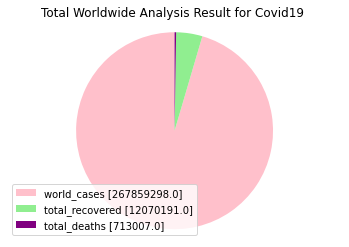

In [35]:
diagram = ['world_cases ['+ str(confirmed_sum)+']' , 'total_recovered ['+ str(recovered_sum)+']','total_deaths ['+ str(death_sum)+']']
TAGS = [confirmed_sum, recovered_sum, death_sum]
colors = ['pink', 'lightgreen','purple']
patches, texts = plt.pie(TAGS,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(diagram)
plt.title("Total Worldwide Analysis Result for Covid19 ")
plt.axis('equal')
plt.show()

### •  Here Bar-chat shows the most critical_cases in top countrires

Text(0.5, 1.0, 'Critical_cases in top countires')

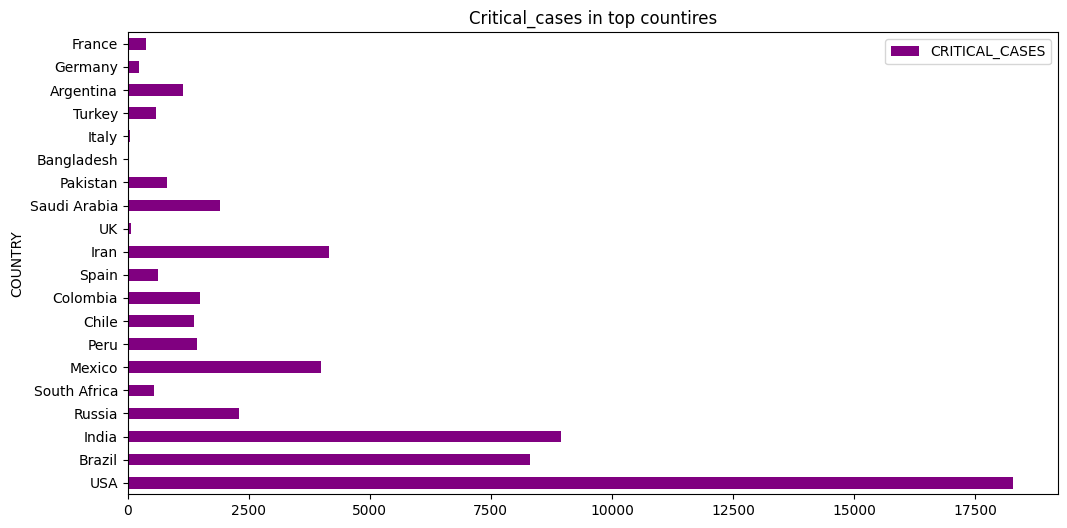

In [36]:
covid19_data.head(20).plot(x='COUNTRY', y='CRITICAL_CASES', kind='barh', figsize=(12,6), color = 'purple')
plt.title("Critical_cases in top countires")

## •  Here scatter plot compares the Total deaths and Total recoverd patient 

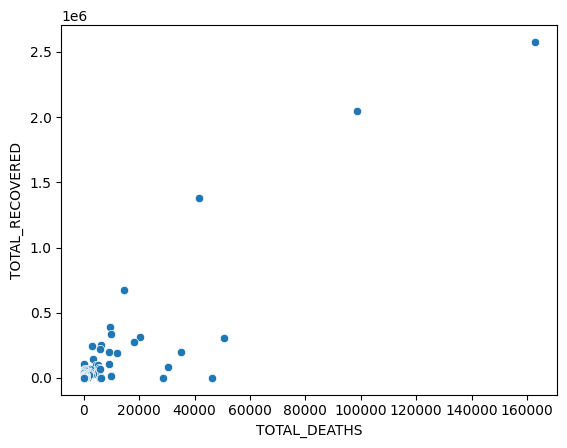

In [37]:
import seaborn as sns

sns.scatterplot(data = covid19_data
                ,x = 'TOTAL_DEATHS'
                ,y = 'TOTAL_RECOVERED'
                )

## • Using interactive map its shows the active_cases of Covid 19 in each countries

In [38]:

#defining colour scales
scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

#drawing interactive map
fig = px.choropleth(data_frame = df,
                    locations= "iso",
                    color= "ActiveCases",  # value in column 'Confirmed' determines color
                    hover_name= "Country/Region",
                    color_continuous_scale= scl,
                    title = "Spread of COVID19")
fig.show()

# Summary :

 •  First, I loaded the covid19 dataset into a data frame using pandas, then I created a new table with the ISO codes of each country and merged it with the covid19 table. Second, I perform data preprocessing and data cleaning such as finding missing data, invalid data such as (NAN) in the covi19 table, and removing duplicated columns. In addition, I aggregate and group the dataset to find maximum and minimum values. Later, I asked four interesting questions about my covid19 data and provided appropriate answers to each of those four questions. Finally, I visualise data using matplot and seaborn with various queries from the covid19 dataset.

# Conclusion:


•  I took one dataset and ran various queries on it, providing the user with detailed and clear information about that dataset. In addition, I plot some graphs with some important table details so that users can easily visualise it.